<a href="https://colab.research.google.com/github/mdig505/beansubin/blob/main/tree/main/python/self_study/google_colab/%EC%A0%84%EA%B5%AD_%EC%8B%A0%EA%B7%9C_%EB%AF%BC%EA%B0%84_%EC%95%84%ED%8C%8C%ED%8A%B8_%EB%B6%84%EC%96%91%EA%B0%80%EA%B2%A9_%EB%8F%99%ED%96%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

내 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


#전국 신규 민간 아파트 분양가격 동향

In [ ]:
#%mv /drive/My\ Drive/google\ colaboration/inflearn/주택도시보증공사_전국\ 평균\ 분양가격2019년\ 12월.csv data
#%mv /drive/My\ Drive/google\ colaboration/inflearn/전국\ 평균\ 분양가격2013년\ 9월부터\ 2015년\ 8월까지.csv data

%ls data

ls: cannot access 'data': No such file or directory


##데이터 로드

In [ ]:
import pandas as pd

df_last = pd.read_csv('/drive/My Drive/google colaboration/inflearn/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv', encoding="cp949")
df_last.shape # 행,열 개수 확인
df_last.head() # 데이터 샘플 확인
df_last.tail() # 데이터 샘플 확인






,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


### 2015년 부터 최근까지의 데이터 로드

In [ ]:
df_first = pd.read_csv('/drive/My Drive/google colaboration/inflearn/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding="cp949")
df_first.shape
df_first.head()
df_first.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,6719,6581,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,5804,5753,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,6577,6778,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,6767,6881,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,7833,7724,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


###데이터 요약하기

In [ ]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


###결측치보기

In [ ]:
df_last.isnull()
df_last.isnull().sum() #결측치 갯수 구하기

df_last.isna()
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

###데이터 타입 변경

In [ ]:
#df_last["분양가격(㎡)"].astype(int) 보통은 astype으로 변경하나 공백 문자가 있어서 불가능하므로 pd.to_numeric 사용

df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"],errors='coerce')
df_last["분양가격"]

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
4330    3882.0
4331       NaN
4332    3898.0
4333       NaN
4334    3601.0
Name: 분양가격, Length: 4335, dtype: float64

###평당분양가격 구하기

In [ ]:
df_last["평당분양가격"] = df_last["분양가격"] * 3.3 #보고서간 단위 맞추기
df_last

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7
...,...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882,3882.0,12810.6
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898,3898.0,12863.4
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN,NaN


###분양가격 요약하기

In [ ]:
df_last.info()

df_last["분양가격(㎡)"].describe() #object 일때의 기술통계 - 결측치도 포함해서 count한다
df_last["분양가격"].describe() #수치데이터일때의 기술통계 - 결측치는 제외하고 count




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

###규모 구분을 전용 면적 컬럼으로 변경

In [ ]:
df_last["규모구분"].unique()
df_last["규모구분"].str.replace("전용면적","") ##셀의 특정 스트링을 변경 replace는 텍스트가 완전히 일치해야만 변경가능해서 pandas의 str 사용
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적","")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과" ,"~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하" ,"")
df_last["전용면적"] = df_last["전용면적"].str.replace(" " ,"").str.strip() #앞뒤 공백도 제거
df_last["전용면적"]

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

###필요없는 컬럼 제거

In [ ]:
df_last = df_last.drop(["규모구분","분양가격(㎡)"], axis = 1) #axis = 0은 행, 1은 열
df_last.info(0)
df_last.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   연도      4335 non-null   int64  
 2   월       4335 non-null   int64  
 3   분양가격    3957 non-null   float64
 4   평당분양가격  3957 non-null   float64
 5   전용면적    4335 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


##group by 로 데이터 집계하기

In [ ]:
# df.groupby(["인덱스로 사용할 컬럼명"])["계산할 컬럼명"].연산()
df_last.groupby(["지역명"])["평당분양가격"].mean()

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [ ]:
df_last.groupby(["전용면적"])["평당분양가격"].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [ ]:
df_last.groupby(["지역명","전용면적"])["평당분양가격"].mean().unstack().round()
#unstack은 두번째 그룹을 컬럼으로 변경

전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,전체
지역명,,,,,
강원,8311.0,7567.0,7486.0,8750.0,7478.0
경기,14772.0,13252.0,12524.0,13678.0,12560.0
경남,10358.0,8689.0,8619.0,10018.0,8659.0
경북,9157.0,7883.0,8061.0,8774.0,8079.0
광주,11042.0,9431.0,9911.0,9296.0,9904.0
대구,13087.0,11992.0,11779.0,11141.0,11771.0
대전,14877.0,9176.0,9711.0,9037.0,9786.0
부산,13208.0,11354.0,11865.0,12073.0,11936.0
서울,23446.0,23213.0,22787.0,25944.0,22610.0


In [ ]:
df_last.groupby(["연도","지역명"])["평당분양가격"].mean().unstack().T
#T는 transpose() 함수 - 행렬 변경

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,7188.060,7162.903846,7273.560000,8219.255000,8934.475000
경기,11060.940,11684.970000,12304.980000,14258.420000,15665.540000
경남,8459.220,8496.730000,8786.760000,9327.670000,10697.615789
경북,7464.160,7753.405000,8280.800000,8680.776923,9050.250000
광주,7916.700,9190.683333,9613.977551,9526.953333,12111.675000
대구,9018.900,10282.030000,12206.700000,12139.252632,14081.650000
대전,8190.600,8910.733333,9957.158491,10234.106667,12619.200000
부산,10377.400,10743.535000,11560.680000,12889.965000,13537.865000
서울,20315.680,21753.435000,21831.060000,23202.245000,28286.830000


##pivot table로 데이터 집계하기

In [ ]:
#피벗테이블은 데이터프레임 형태로 결과가 나온다, groupby는 시리즈로 가져온다(groupby가 더 빠름)
pd.pivot_table(df_last, index=["지역명"], values =["평당분양가격"], aggfunc = "count")

,평당분양가격
지역명,
강원,242
경기,250
경남,247
경북,241
광주,201
대구,242
대전,198
부산,250
서울,250


In [ ]:
pd.pivot_table(df_last, index="전용면적", values ="평당분양가격", aggfunc = "mean")

,평당분양가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [ ]:
df_last.pivot_table(index = "전용면적",columns="지역명", values ="평당분양가격", aggfunc = "mean").round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [ ]:
p = df_last.pivot_table(index = ["연도","지역명"], values ="평당분양가격", aggfunc = "mean").round()
p.loc[2017]

,평당분양가격
지역명,
강원,7274.0
경기,12305.0
경남,8787.0
경북,8281.0
광주,9614.0
대구,12207.0
대전,9957.0
부산,11561.0
서울,21831.0


##최근 데이터 시각화하기

###데이터시각화를 위한 폰트설정(런타임다시시작 필요)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
#!apt -qq -y install fonts-nanum


fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


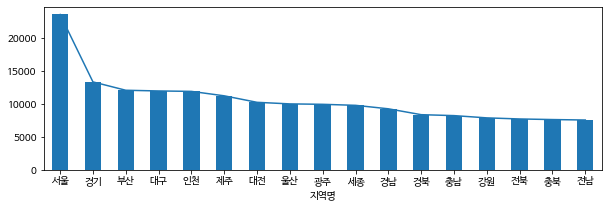

In [ ]:
g = df_last.groupby(["지역명"])["평당분양가격"].mean().sort_values(ascending = False)
g.plot()
g.plot(kind= "bar")
g.plot.bar(rot = 0, figsize = (10,3))


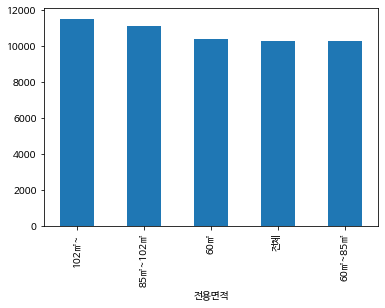

In [ ]:
a = df_last.groupby(["전용면적"])["평당분양가격"].mean().sort_values(ascending = False)
a.plot.bar()

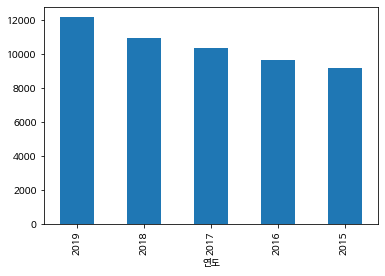

In [ ]:
a = df_last.groupby(["연도"])["평당분양가격"].mean().sort_values(ascending = False)
a.plot.bar()

###박스 플롯의 다섯가지 수치 이해 및 분양가 시각화

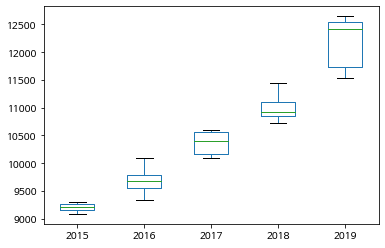

In [ ]:
df_last.pivot_table(index = "월",columns = "연도", values="평당분양가격").plot.box()

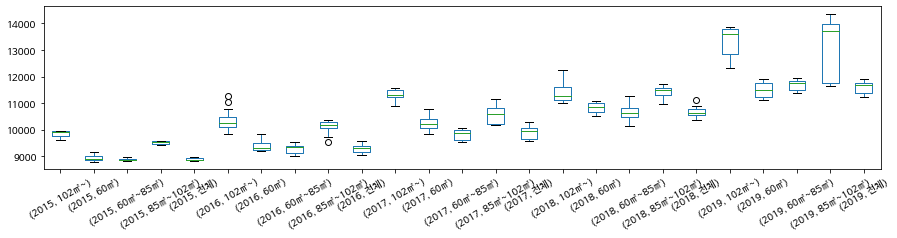

In [ ]:
p = df_last.pivot_table(index = "월",columns = ["연도","전용면적"], values="평당분양가격")
p.plot.box(figsize = (15,3), rot = 30)

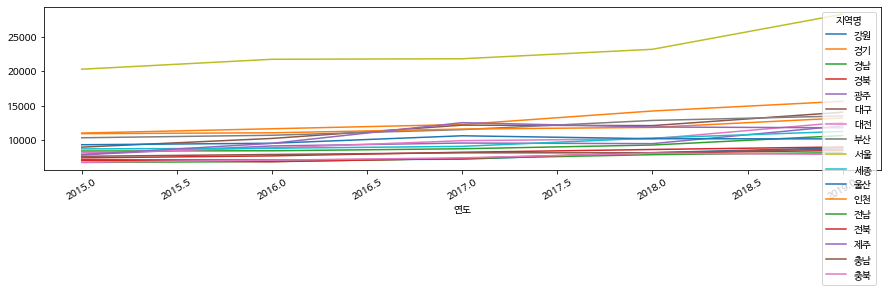

In [ ]:
p = df_last.pivot_table(index = "연도",columns = ["지역명"], values="평당분양가격")
p.plot.line(figsize = (15,3), rot = 30)

###seaborn으로 시각화

In [ ]:
import seaborn as sns

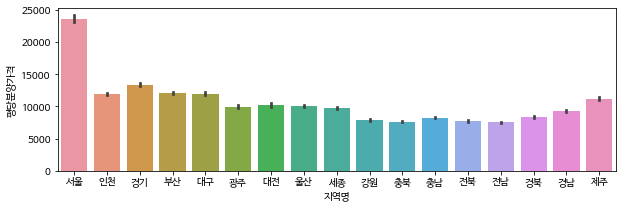

In [ ]:
plt.figure(figsize=(10,3))
# ci : 기본 95%의 신뢰구간을 바탕으로 나머지 5%의 이상치를 제외한다
sns.barplot(data = df_last , x = "지역명", y = "평당분양가격")

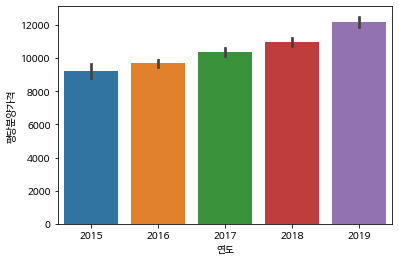

In [ ]:
sns.barplot(data=df_last, x="연도", y="평당분양가격")

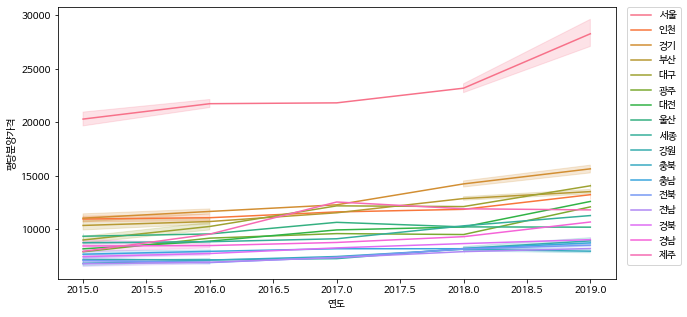

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_last, x = "연도", y = "평당분양가격", hue = "지역명")
plt.legend(bbox_to_anchor = (1.02,1), loc = 2, borderaxespad = 0.) #인덱스 밖으로 빼기

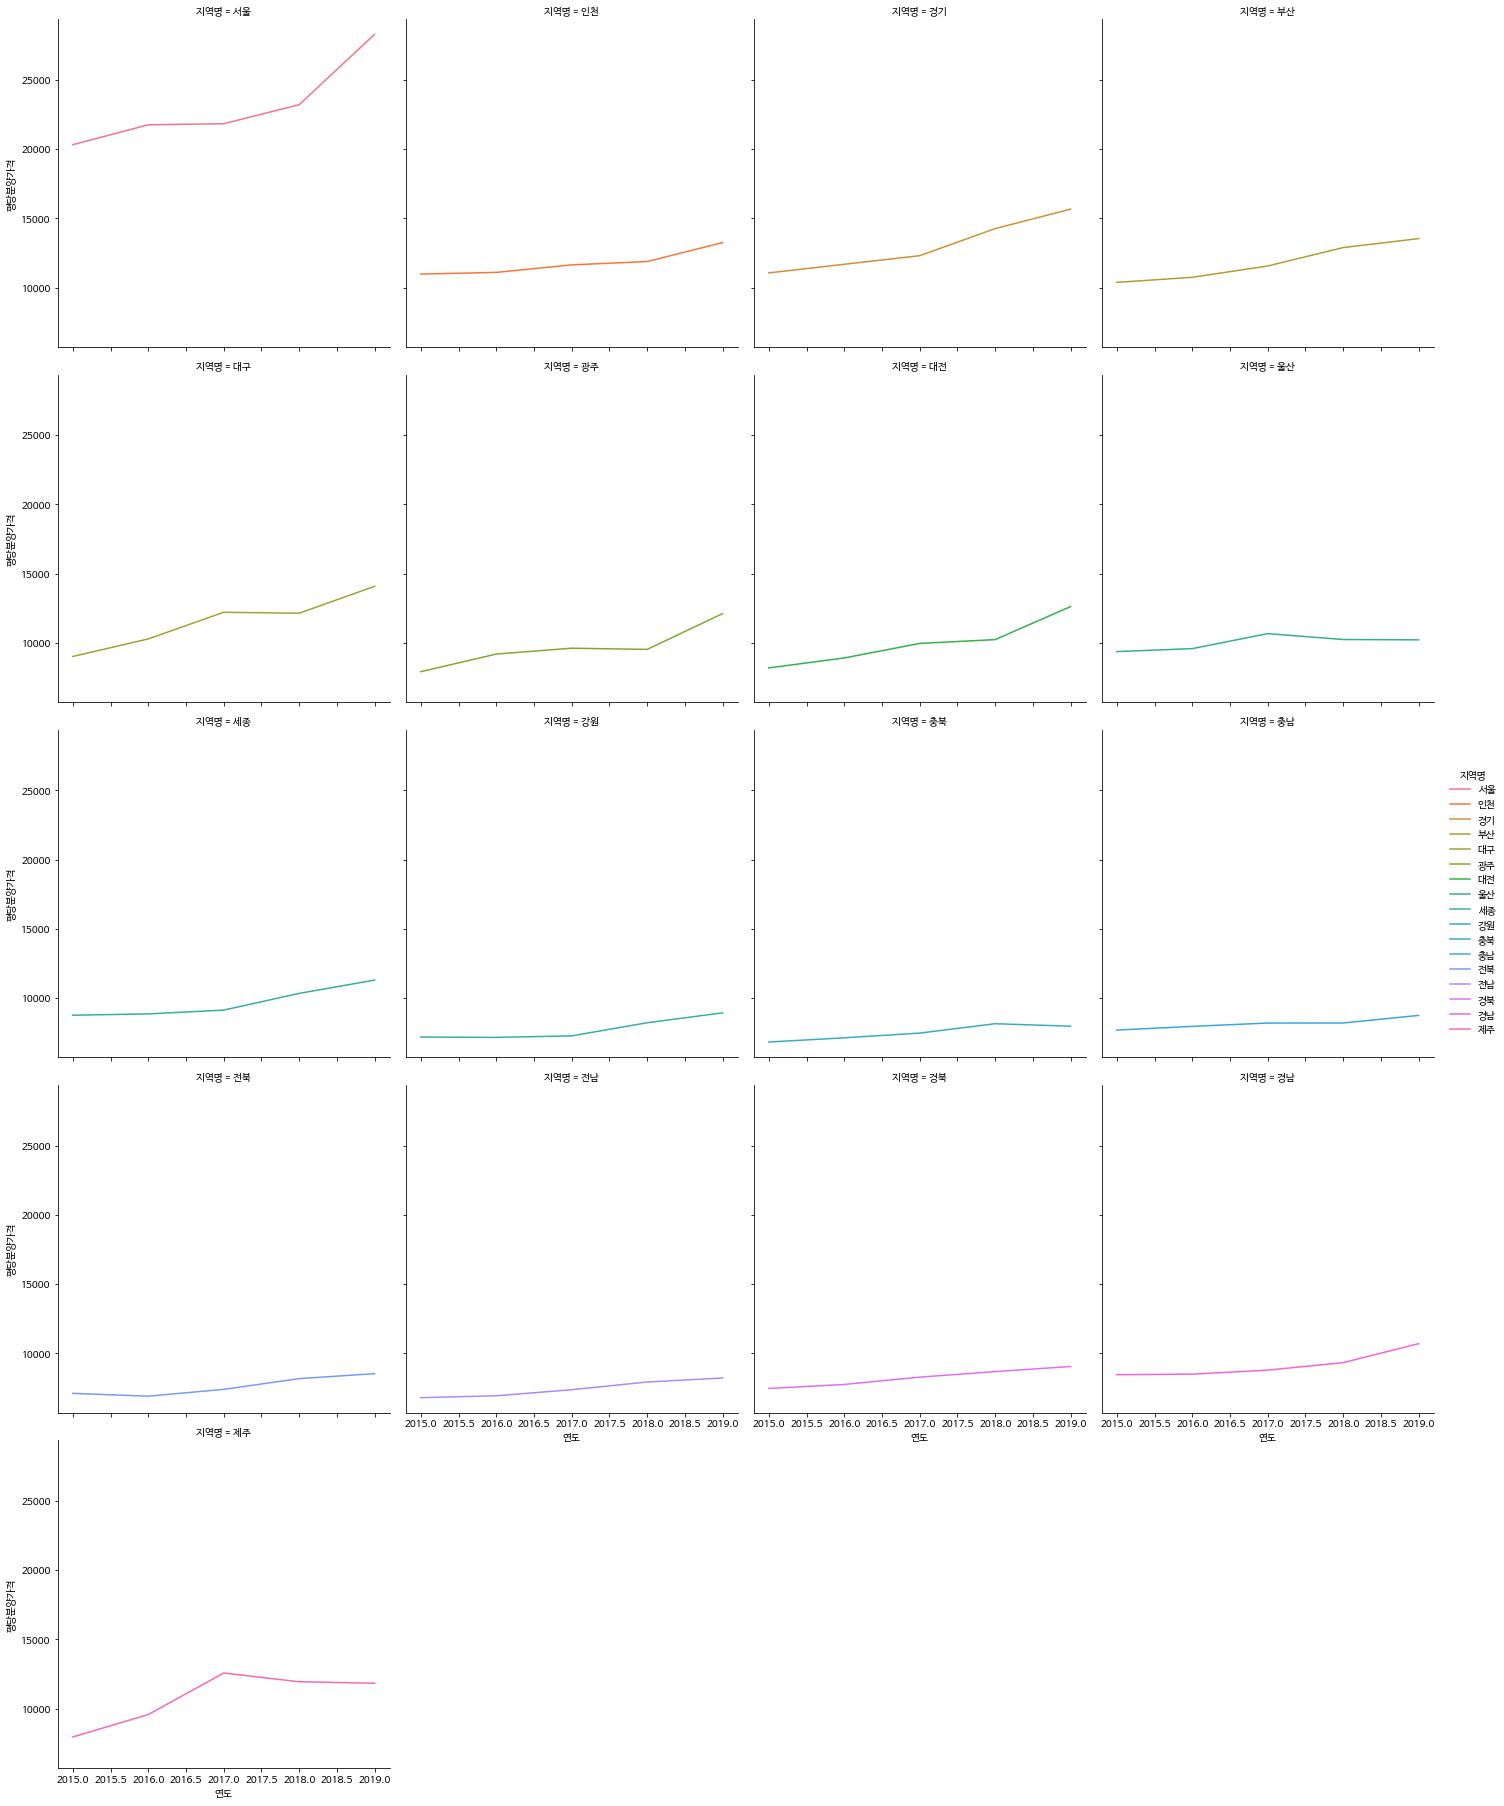

In [ ]:
# 선그래프 서브플롯 그리기
sns.relplot(data=df_last, x = "연도", y = "평당분양가격", hue = "지역명",kind="line", col="지역명", col_wrap=4, ci = None)

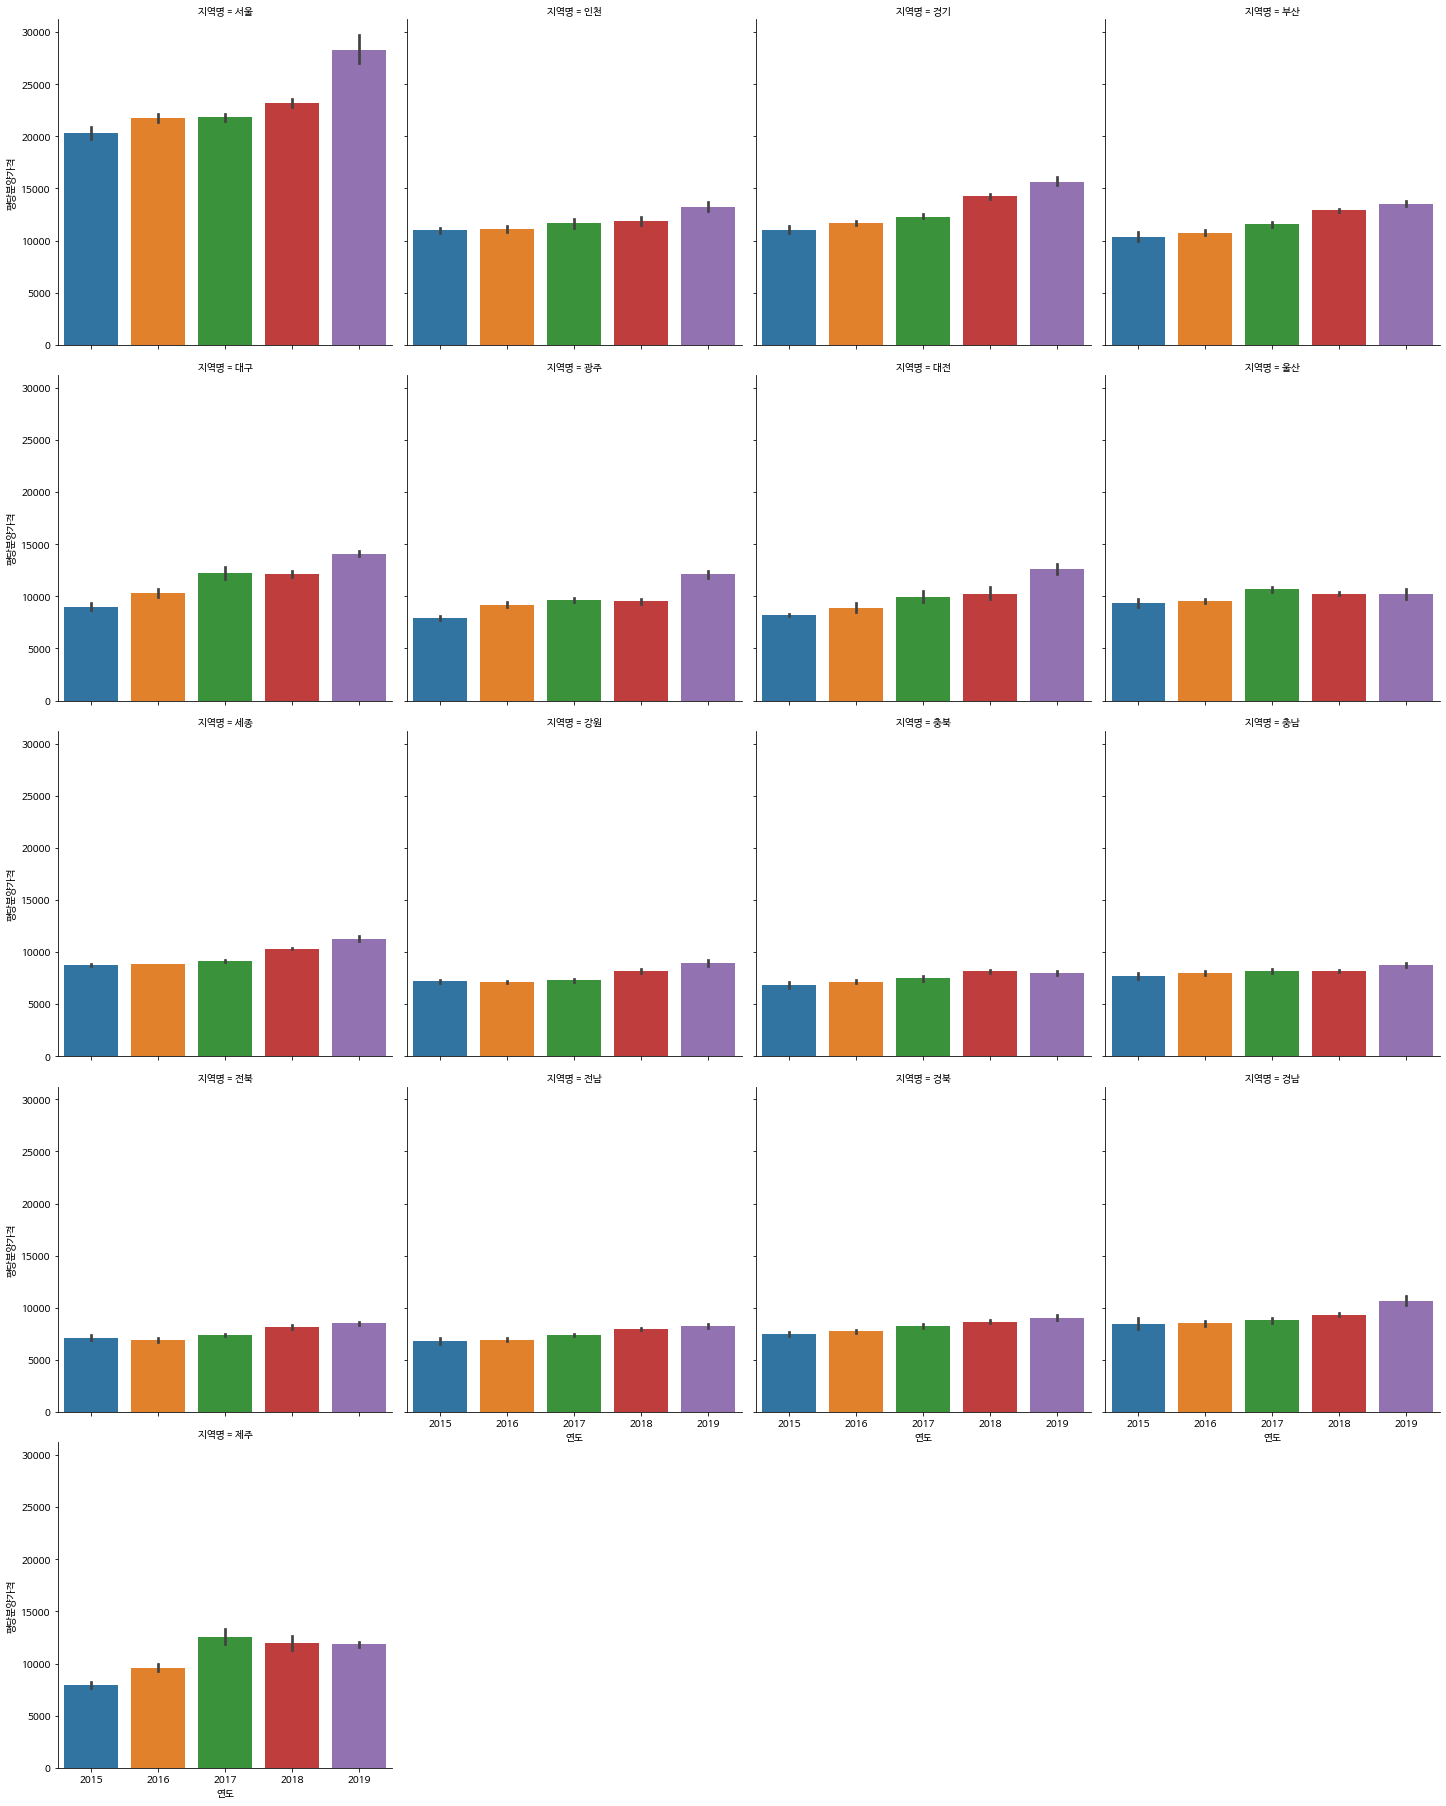

In [ ]:
#바플롯 서브플롯
sns.catplot(data= df_last, x = "연도", y = "평당분양가격", kind = "bar", col = "지역명", col_wrap=4)

###boxplot과 violinplot 그리기

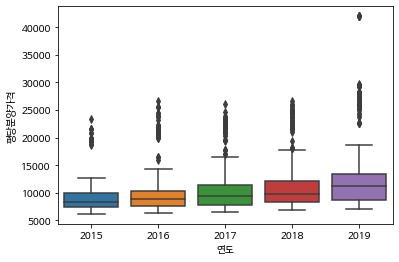

In [ ]:
sns.boxplot(data= df_last , x = "연도", y ="평당분양가격")

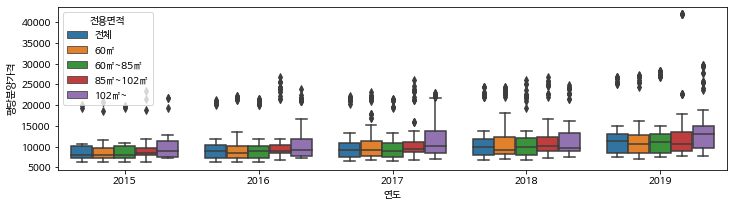

In [ ]:
plt.figure(figsize = (12,3))
sns.boxplot(data= df_last , x = "연도", y ="평당분양가격", hue = "전용면적")

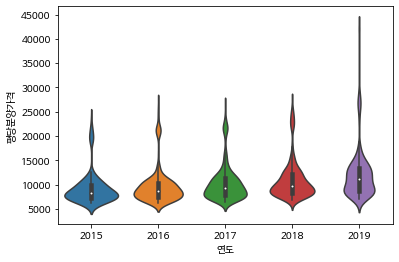

In [ ]:
#바이올린 플롯 : 박스플롯의 단점을 보완하는 플롯, 데이터의 분포를 확인할 수 있다. 밀도측정그래프를 세로로 세워놓은 모양
sns.violinplot(data= df_last , x = "연도", y ="평당분양가격")

### lmplot, swarmplot 그리기



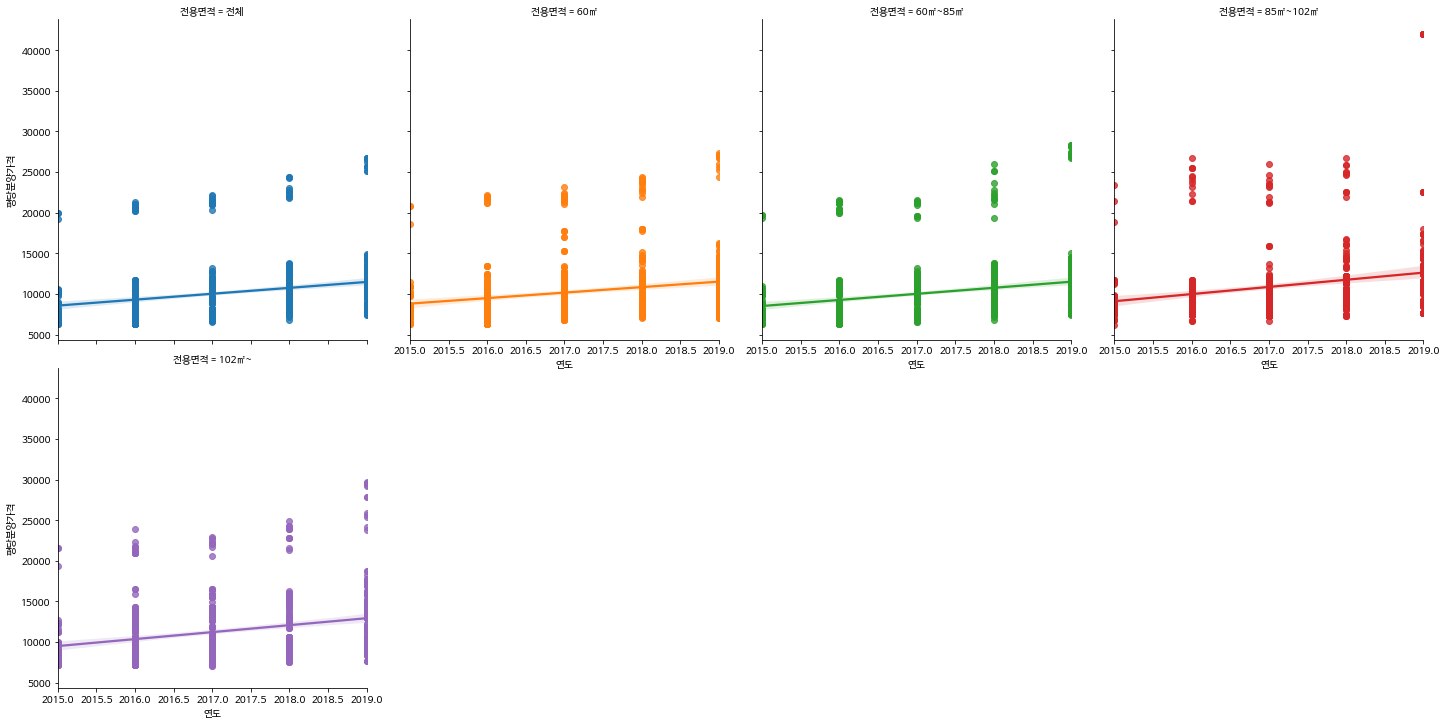

In [ ]:
#lmplot : x,y 축이 모두 수치데이터일때 사용하는것이 적합
#sns.scatterplot(data=df_last, x="연도", y="평당분양가격")
#sns.regplot(data=df_last, x="연도", y="평당분양가격") #regplot : scatterplot에 회귀선 그리는 플롯

sns.lmplot(data=df_last, x="연도", y="평당분양가격", hue = "전용면적", col ="전용면적",col_wrap=4)  #regplot에 hue 지정

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 60.0% of the points cannot be placed; y

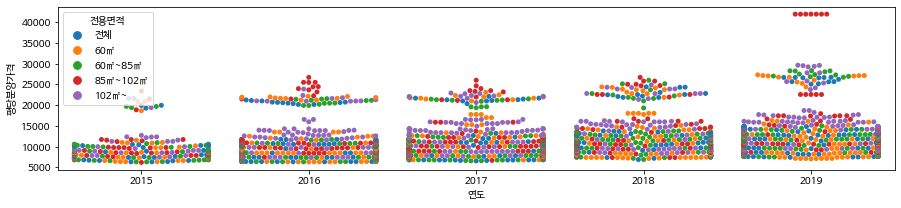

In [ ]:
plt.figure(figsize=(15,3))
sns.swarmplot(data=df_last,x="연도",y="평당분양가격", hue = "전용면적")

###이상치보기

In [ ]:
df_last["평당분양가격"].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

In [ ]:
max_price = df_last["평당분양가격"].max()
max_price

42002.399999999994

In [ ]:
df_last[df_last["평당분양가격"] == max_price]
#데이터를 시각화 하는 이유 : 이상치 확인, 데이터의 경향성 확인, 데이터에 대한 가설을 세우고 검정해볼때 다양하게 표현이 가능한 점!

,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


###수치데이터 히스토그램

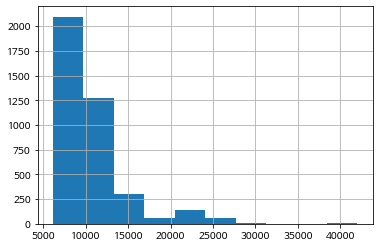

In [ ]:
h = df_last["평당분양가격"].hist(bins = 10)
#h = df_last.hist(bins = 10)

In [ ]:
price = df_last.loc[df_last["평당분양가격"].notnull(), "평당분양가격"]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


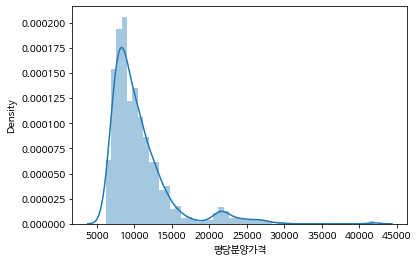

In [ ]:
sns.distplot(price)

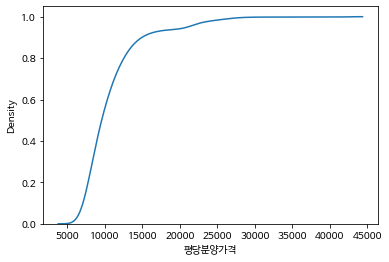

In [ ]:
#sns.distplot(price, hist = False, rug=True)
sns.kdeplot(price, cumulative=True) #cumulative로 누적그래프 그릴 수 있음

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/dis

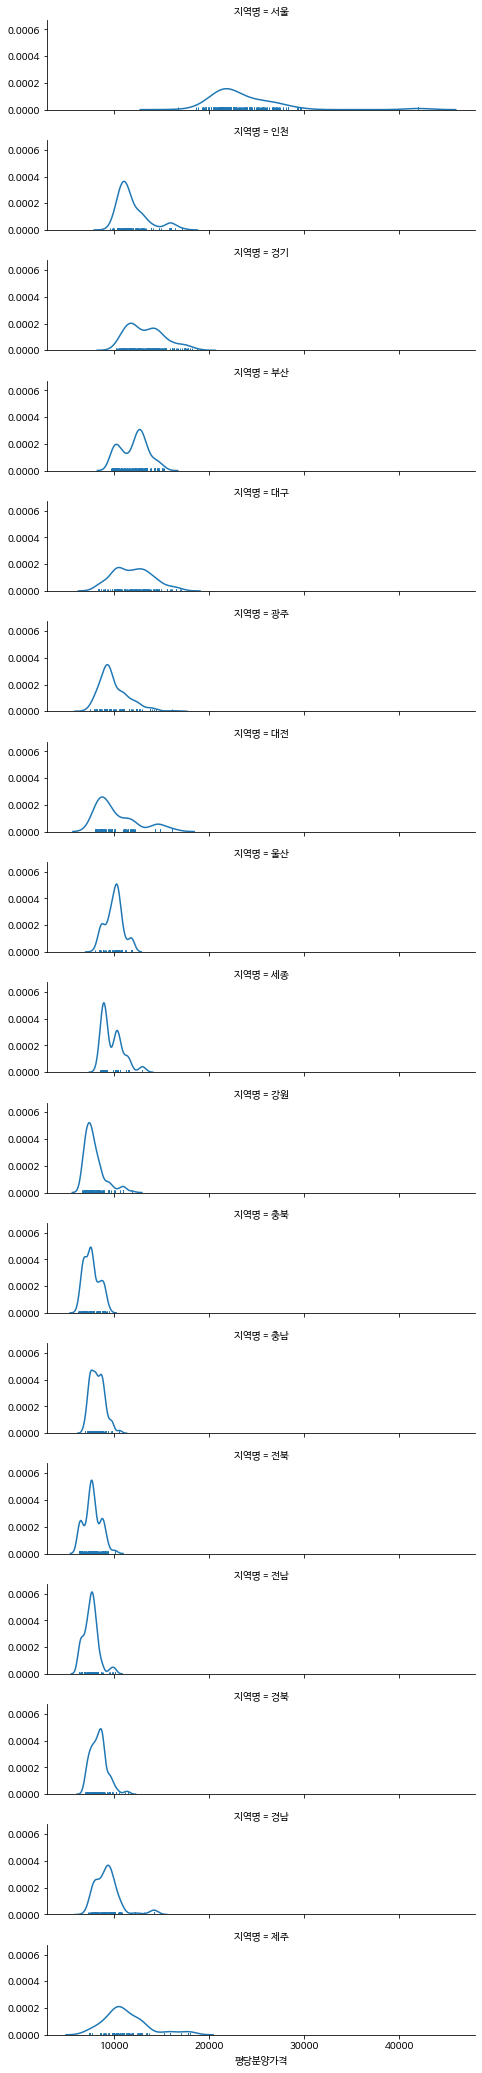

In [ ]:
#ridgeplot = distplot의 서브플롯

g = sns.FacetGrid(df_last, row="지역명", height=1.7,aspect=4,)
g.map(sns.distplot,"평당분양가격", hist = False,rug=True)

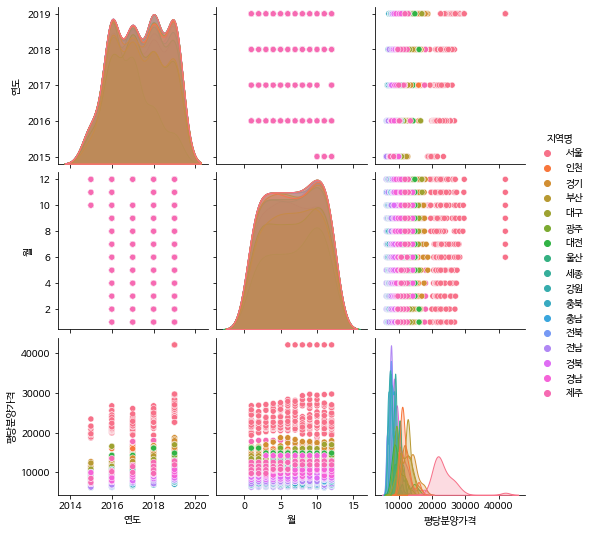

In [ ]:
df_last_notnull = df_last.loc[df_last["평당분양가격"].notnull(),["연도","월","평당분양가격","지역명","전용면적"]]
sns.pairplot(df_last_notnull, hue = "지역명")

In [ ]:
df_last["전용면적"].value_counts()

102㎡~       867
전체          867
60㎡~85㎡     867
85㎡~102㎡    867
60㎡         867
Name: 전용면적, dtype: int64

##2015년 8월 이전 데이터 보기

In [ ]:
pd.options.display.max_columns = 25
df_first
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [ ]:
df_first.isnull().sum() #결측치체크

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

###melt로 tidy data 만들기

In [ ]:
df_first_melt = df_first.melt(id_vars="지역", var_name = "기간", value_name = "평당분양가격")
df_first_melt.head()

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [ ]:
df_first_melt.columns = ["지역명","기간","평당분양가격"]
df_first_melt

,지역명,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


###연도와 월을 분리하기

In [ ]:
date = "2013년12월"

date.split("년")[0]
date.split("년")[-1].replace("월","")

'12'

In [ ]:
def parse_year (date) :
  year = date.split("년")[0]
  year = int(year)
  month = date.split("년")[-1].replace("월","")
  return year

y = parse_year(date)


In [ ]:
def parse_month (date) :
  month = date.split("년")[-1].replace("월","")
  month = int(month)
  return month

parse_month(date)


12

In [ ]:
df_first_melt["연도"] = df_first_melt["기간"].apply(parse_year)
df_first_melt.head()

,지역명,기간,평당분양가격,연도
0,서울,2013년12월,18189,2013
1,부산,2013년12월,8111,2013
2,대구,2013년12월,8080,2013
3,인천,2013년12월,10204,2013
4,광주,2013년12월,6098,2013


In [ ]:
df_first_melt["월"] = df_first_melt["기간"].apply(parse_month)
df_first_melt.head()

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


In [ ]:
df_last.columns.to_list()
cols = ['지역명', '연도', '월',  '평당분양가격']


In [ ]:
#데이터 프레임의 사본을 만들면 원본에 영향을 주게 되는데 이런 현상을 방지하기 위해 copy()를 사용
df_last_prepare = df_last.loc[df_last["전용면적"] == "전체",cols].copy()
df_last_prepare

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6
...,...,...,...,...
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9


In [ ]:
df_first_prepare = df_first_melt[cols].copy()
df_first_prepare

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189
1,부산,2013,12,8111
2,대구,2013,12,8080
3,인천,2013,12,10204
4,광주,2013,12,6098
...,...,...,...,...
352,전북,2015,8,6580
353,전남,2015,8,6289
354,경북,2015,8,7037
355,경남,2015,8,7665


###concat으로 데이터 합치기

In [ ]:
df = pd.concat([df_first_prepare,df_last_prepare])
df.shape
df["연도"].value_counts(sort = False)

2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
Name: 연도, dtype: int64

###pivot table 사용하기

In [ ]:
t = pd.pivot_table(df, index = "연도", columns="지역명", values= "평당분양가격").round()

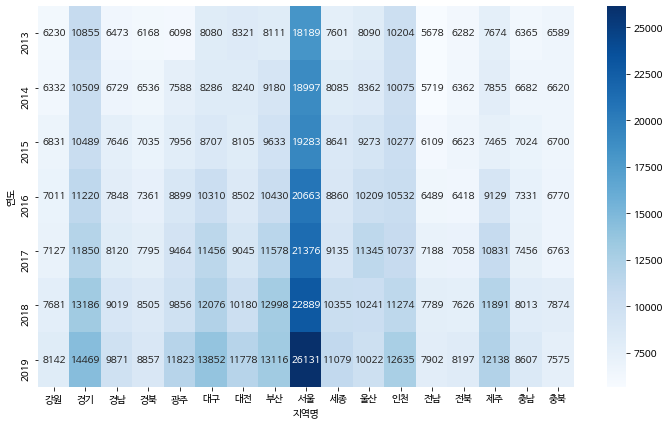

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(t, cmap = "Blues", annot = True, fmt = ".0f")

In [ ]:
t.transpose()

연도,2013,2014,2015,2016,2017,2018,2019
지역명,,,,,,,
강원,6230.0,6332.0,6831.0,7011.0,7127.0,7681.0,8142.0
경기,10855.0,10509.0,10489.0,11220.0,11850.0,13186.0,14469.0
경남,6473.0,6729.0,7646.0,7848.0,8120.0,9019.0,9871.0
경북,6168.0,6536.0,7035.0,7361.0,7795.0,8505.0,8857.0
광주,6098.0,7588.0,7956.0,8899.0,9464.0,9856.0,11823.0
대구,8080.0,8286.0,8707.0,10310.0,11456.0,12076.0,13852.0
대전,8321.0,8240.0,8105.0,8502.0,9045.0,10180.0,11778.0
부산,8111.0,9180.0,9633.0,10430.0,11578.0,12998.0,13116.0
서울,18189.0,18997.0,19283.0,20663.0,21376.0,22889.0,26131.0


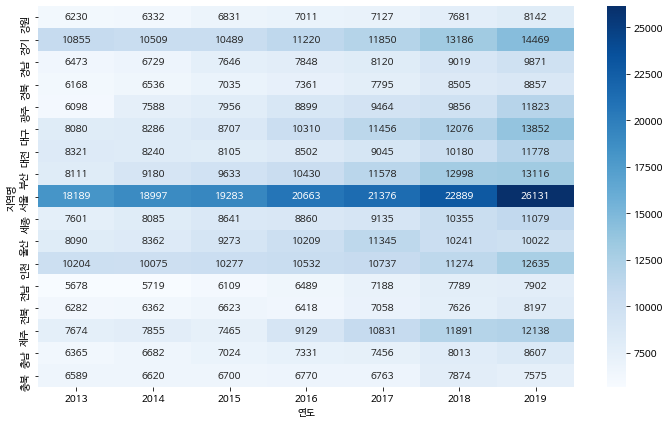

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(t.T, cmap = "Blues", annot = True, fmt = ".0f")

In [ ]:
g= df.groupby(["연도","지역명"])["평당분양가격"].mean().unstack().round()

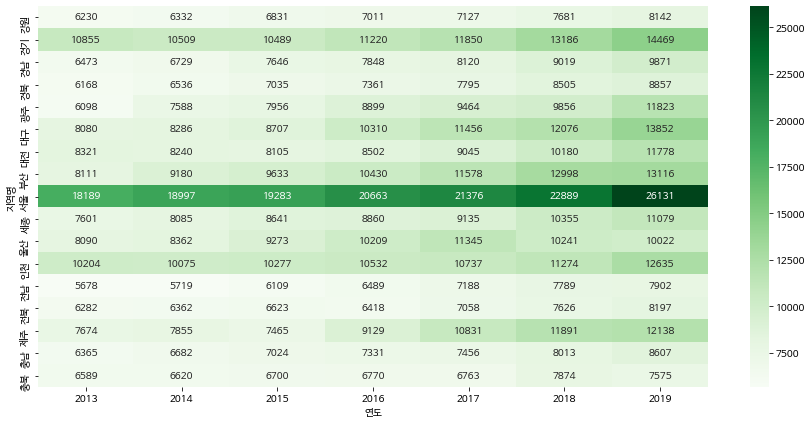

In [ ]:
plt.figure(figsize = (15,7))
sns.heatmap(g.T, annot=True, fmt = ".0f" , cmap = "Greens")

##2013년부터 최근데이터까지 시각화

###연도별 평균분양가격 보기

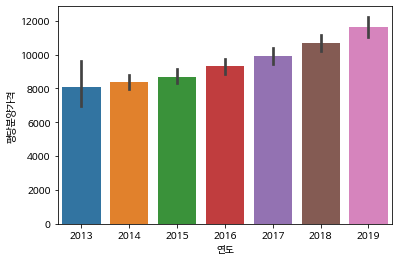

In [ ]:
#barplot >연도별 평균 평당분양가격
sns.barplot(data=df, x = "연도", y = "평당분양가격")

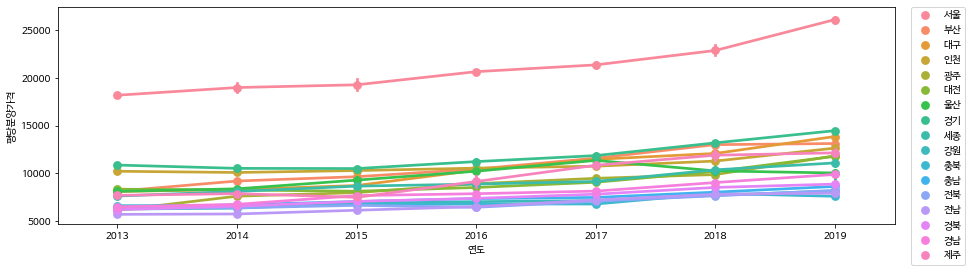

In [ ]:
#pointplot >연도별 평균 평당분양가격
plt.figure(figsize=(15,4))
sns.pointplot(data=df, x = "연도", y = "평당분양가격", hue = "지역명")
plt.legend(bbox_to_anchor = (1.02,1), loc = 2, borderaxespad = 0.)

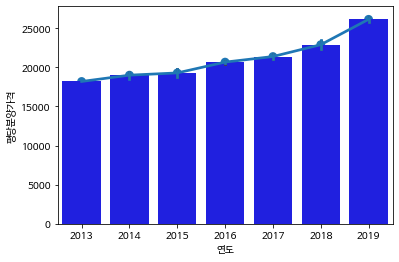

In [ ]:
#서울만 barplot
df_seoul = df[df["지역명"]=="서울"].copy()

sns.barplot(data=df_seoul, x="연도", y= "평당분양가격", color = "b")
sns.pointplot(data=df_seoul, x="연도", y= "평당분양가격")

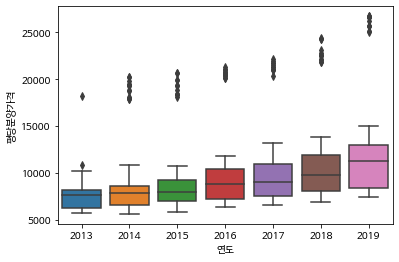

In [ ]:
#연도별 평당분양가격 boxplot
sns.boxplot(data = df , x="연도",y ="평당분양가격")

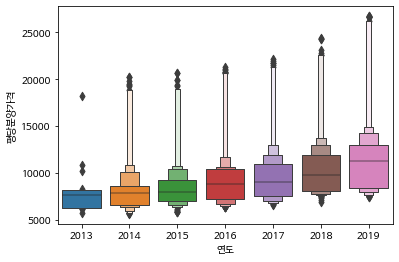

In [ ]:
sns.boxenplot(data = df , x="연도",y ="평당분양가격")

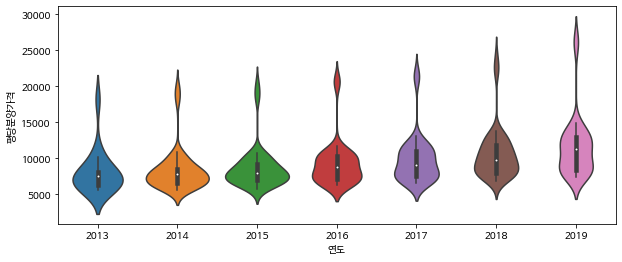

In [ ]:
plt.figure(figsize = (10,4))
sns.violinplot(data=df , x="연도",y ="평당분양가격")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.7% of the points cannot be placed; y

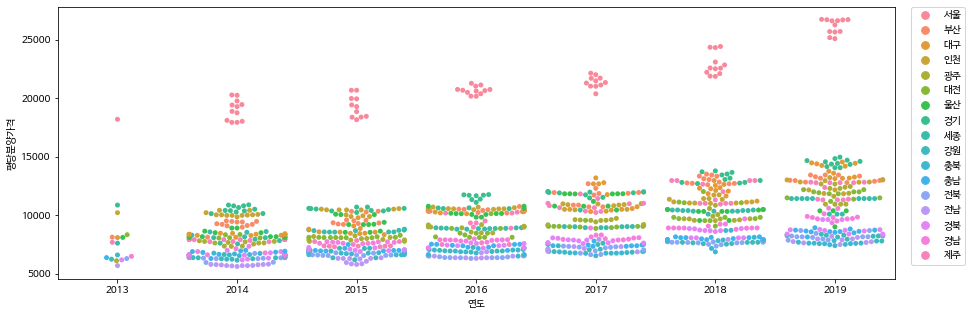

In [ ]:
plt.figure(figsize = (15,5))
sns.swarmplot(data= df , x="연도",y ="평당분양가격", hue = "지역명")
plt.legend(bbox_to_anchor = (1.02,1), loc = 2, borderaxespad = 0.)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.1% of the points cannot be placed; y

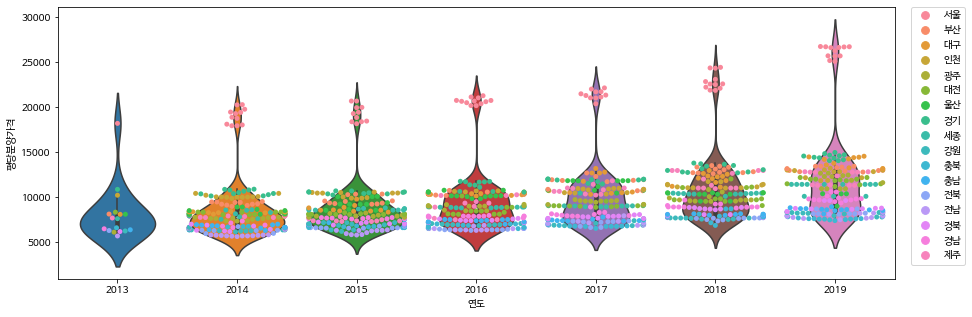

In [ ]:
plt.figure(figsize = (15,5))
sns.violinplot(data= df , x="연도",y ="평당분양가격")
sns.swarmplot(data= df , x="연도",y ="평당분양가격", hue = "지역명")
plt.legend(bbox_to_anchor = (1.02,1), loc = 2, borderaxespad = 0.)

###지역별 평당분양가격 보기

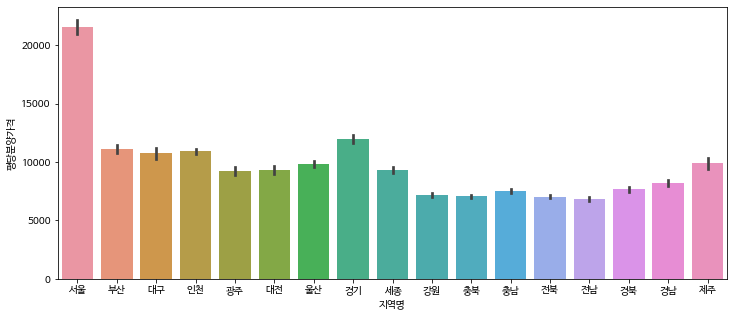

In [ ]:
plt.figure(figsize = (12,5))
sns.barplot(data=df, x = "지역명", y = "평당분양가격")

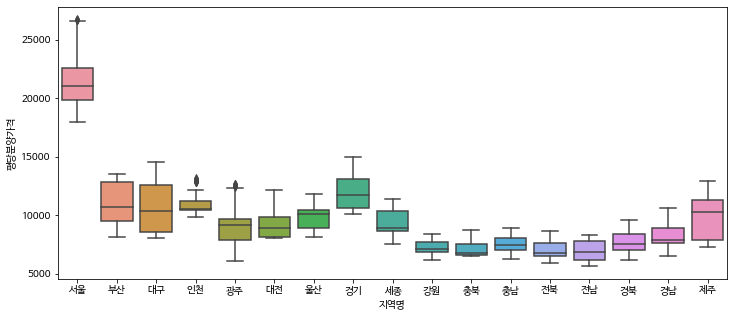

In [ ]:
plt.figure(figsize = (12,5))
sns.boxplot(data=df, x = "지역명", y = "평당분양가격")

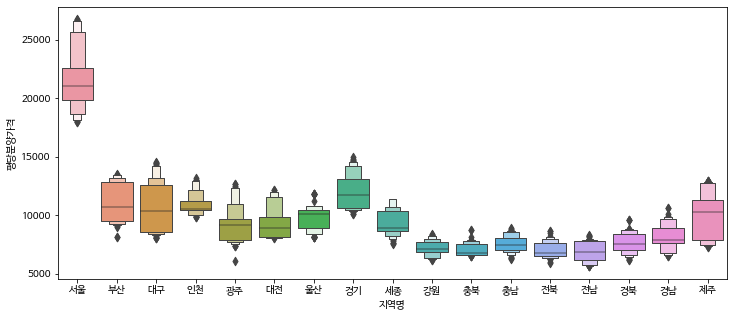

In [ ]:
plt.figure(figsize = (12,5))
sns.boxenplot(data=df, x = "지역명", y = "평당분양가격")

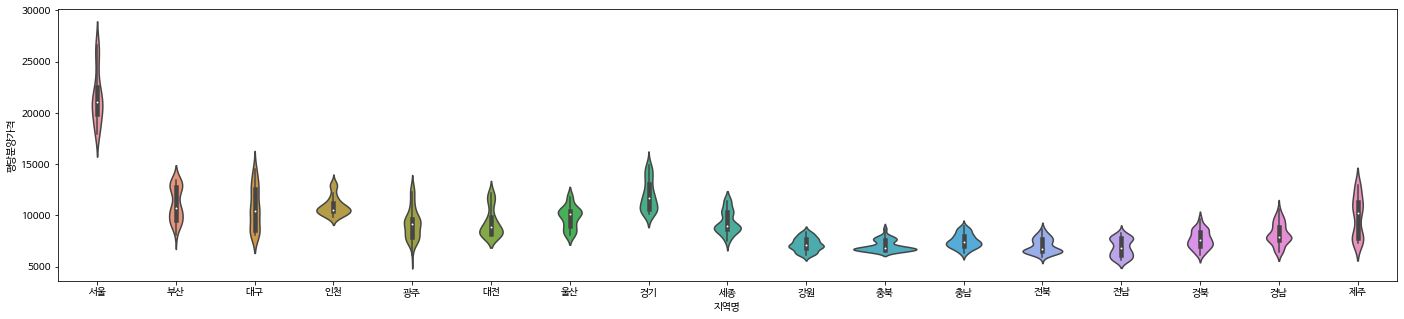

In [ ]:
plt.figure(figsize = (24,5))
sns.violinplot(data=df, x = "지역명", y = "평당분양가격")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you

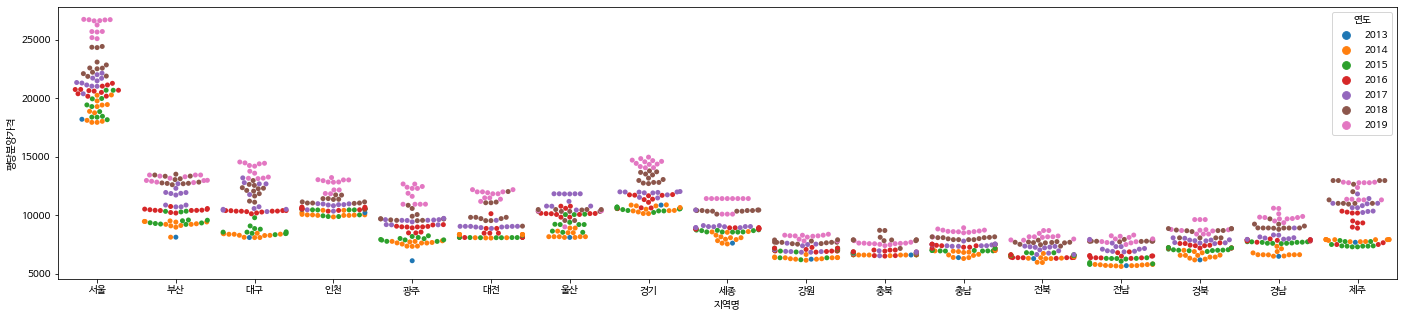

In [ ]:
plt.figure(figsize = (24,5))
sns.swarmplot(data=df, x = "지역명", y = "평당분양가격", hue = "연도")

#상가(상권)정보로 기술통계 익히기

##라이브러리 로드

In [ ]:
#라이브러리 로드
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt


##한글폰트설정

In [ ]:
#!apt -qq -y install fonts-nanum


fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
plt.rc("axes", unicode_minus=False)
mpl.font_manager._rebuild()


In [ ]:
#폰트를 선명하게 표시

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")